# Assignment

Create code cells below, read in your dataset to accomplish 4 python tasks:

1. Print out the basic statistics of the data. For numeric data, this should include the mean, median, mode, range, standard deviation, and interquartile (25%, 50%, 75%) range. For categorical data, it should include the number of unique values.
2. For each variable, indicate the number of missing values.
3. Choose two variables. Calculate the skew and kurtosis for each of these variables.
4. Choose two variables. Represent one variable in a histogram. In the other, filter it to represent multiple box plots.

Below your statistics, explain what information you can extract about your dataset from the statistics you have calculated.

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/MyDrive/netflix_titles.csv.zip'
df = pd.read_csv(file_path)

df.head()

Mounted at /content/drive


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/netflix_titles.csv.zip'
df = pd.read_csv(file_path)

In [4]:
numeric_cols = df.select_dtypes(include=['number'])

for col in numeric_cols.columns:
    print(f"--- Statistics for {col} ---")
    print(f"Mean: {numeric_cols[col].mean()}")
    print(f"Median: {numeric_cols[col].median()}")
    print(f"Mode: {numeric_cols[col].mode().values}")
    print(f"Range: {numeric_cols[col].max() - numeric_cols[col].min()}")
    print(f"Standard Deviation: {numeric_cols[col].std()}")
    print(f"IQR (25% - 75%): {numeric_cols[col].quantile(0.75) - numeric_cols[col].quantile(0.25)}\n")

categorical_cols = df.select_dtypes(include=['object'])

for col in categorical_cols.columns:
    print(f"--- Unique values in '{col}': {df[col].nunique()} ---")

--- Statistics for release_year ---
Mean: 2014.1801975701146
Median: 2017.0
Mode: [2018]
Range: 96
Standard Deviation: 8.819312130834057
IQR (25% - 75%): 6.0

--- Unique values in 'show_id': 8807 ---
--- Unique values in 'type': 2 ---
--- Unique values in 'title': 8807 ---
--- Unique values in 'director': 4528 ---
--- Unique values in 'cast': 7692 ---
--- Unique values in 'country': 748 ---
--- Unique values in 'date_added': 1767 ---
--- Unique values in 'rating': 17 ---
--- Unique values in 'duration': 220 ---
--- Unique values in 'listed_in': 514 ---
--- Unique values in 'description': 8775 ---


In [5]:
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [6]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year


clean_df = df.dropna(subset=['year_added'])


for col in ['release_year', 'year_added']:
    print(f"--- {col} ---")
    print(f"Skew: {stats.skew(clean_df[col])}")
    print(f"Kurtosis: {stats.kurtosis(clean_df[col])}\n")

--- release_year ---
Skew: -3.447589058018016
Kurtosis: 16.252042189893956

--- year_added ---
Skew: -0.7130464370476323
Kurtosis: 1.3689764942727622



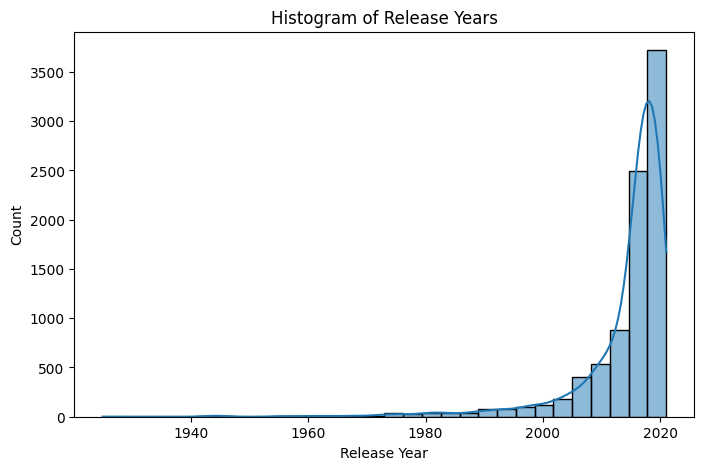

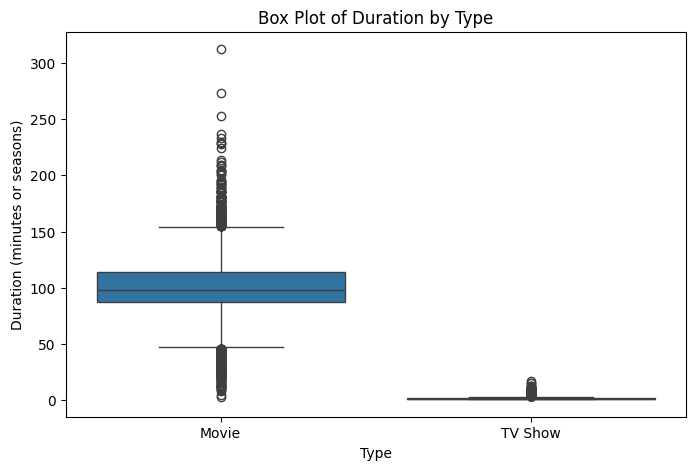

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Histogram of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


df['duration_clean'] = df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(8,5))
sns.boxplot(x='type', y='duration_clean', data=df)
plt.title('Box Plot of Duration by Type')
plt.xlabel('Type')
plt.ylabel('Duration (minutes or seasons)')
plt.show()

#Based on the statistics, we can observe several different insights. The mean and median release years are relatively close, indicating a somewhat symmetric distribution, but the slight skew and kurtosis suggest there are still outliers in the dataset. The standard deviation tells us how spread out the release years are, and the IQR gives a better sense of the middle range of values. From the box plot, we can also see that movies tend to vary more in length, while TV shows have a more consistent duration (in terms of seasons). Knowing the number of unique values in categorical columns helps us understand diversity in genres, countries, etc. Finally, tracking missing values tells us which columns need cleaning before more analysis can take place .